## Classificador linear

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Base de dados :

In [3]:
data = pd.read_excel('titanic_reduced_database_ready.xlsx')

data.head()


C:\Users\higorh\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sobrevivente,classe_da_passagem,nome_passageiro,sexo,idade,irmaos_ou_esposa_a_bordo,pais_filhos_a_bordo,valor_passagem,local_de_embarque
0,nao,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
1,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,712833.00,C
2,sim,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7925.00,S
3,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
4,nao,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


## Preparação da base de dados para utilização no classificador :

In [8]:
#Cria um array de 1's para se tornar a ultima coluna 
xo = np.ones(700)
features = np.asmatrix([xo, data[0] , data[2]])
features = features.transpose()
print(features[:10,:])

KeyError: 0

In [ ]:
labels = np.array(data[4])
print(labels[:100])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


## Visualização das classes :

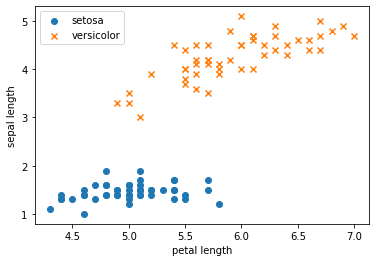

In [ ]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## Inicialização e parâmetros do classificador :

In [ ]:
#w = np.zeros(shape=(1, features.shape[1]))

w = np.random.randn(features.shape[1]).reshape(1,3)

misclassified_ = [] 

num_iter = 10

print('Inicializacao dos coeficientes w do classificador =', w)

Inicializacao dos coeficientes w do classificador = [[-1.33931633 -0.72359571 -0.36425762]]


## Algoritmo classificador utilizando o Perceptron :

In [ ]:
for epoch in range(num_iter):
    
    misclassified = 0
    
    for x, label in zip(features, labels):
        
        y = np.dot(w, x.transpose())
        
        #perceptron:
        
        target = 1.0 if (y > 0) else -1.0
        
        #
        
        delta = (label - target)
        
        if(delta):
            misclassified += 1
            w += label * x
            
    misclassified_.append(misclassified)

epochs = np.arange(1, num_iter+1)

print('Coeficientes w do classificador =', w)

Coeficientes w do classificador = [[-2.33931633 -1.82359571  4.83574238]]


## Erro de classificação :

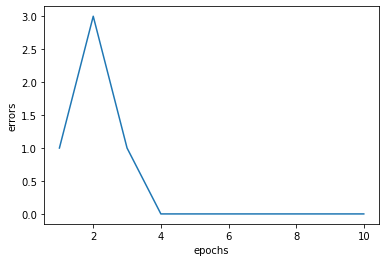

In [ ]:
plt.plot(epochs, np.array(misclassified_))
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

## Visualização do classificador :

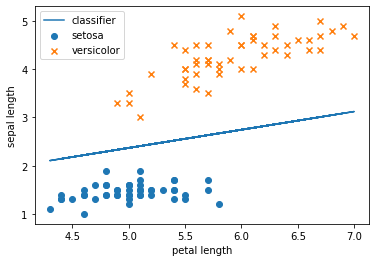

In [ ]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.plot((np.array(features[:,1])), -w[0][0]/w[0][2]-w[0][1]/w[0][2]*(np.array(features[:,1])), label='classifier')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## API

In [ ]:
nova_planta = np.array([1, 6.7, 5.2])
classe_planta_nova = np.dot(w,nova_planta.transpose())
print('Valor do classificador =' + '' + str(classe_planta_nova))
classe_final = 'Versicolor' if (classe_planta_nova > 0) else 'Setosa'
print('A nova planta é da espécie:' , classe_final)

Valor do classificador =[10.58845279]
A nova planta é da espécie: Versicolor
